In [158]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [160]:
data = pd.read_csv('../input/heart.csv')
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


Dataset Columns (Features)
* 
Age (age in years) 
* 
Sex (1 = male; 0 = female) 
* 
CP (chest pain type)
* 
TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* 
CHOL (serum cholestoral in mg/dl)
* 
FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* 
RESTECH (resting electrocardiographic results)
* 
THALACH (maximum heart rate achieved)
* 
EXANG (exercise induced angina (1 = yes; 0 = no))
* 
OLDPEAK (ST depression induced by exercise relative to rest)
* 
SLOPE (the slope of the peak exercise ST segment)
* 
CA (number of major vessels (0-3) colored by flourosopy)
* 
THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
* 
TARGET (1 or 0)

# Data Exploration

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [162]:
data.shape

(303, 14)

In [163]:
#Missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [164]:
#desc stats
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



 
 
 
 # Checking how the target values depend on various features.**
 
 
** 1.sex**
 
 

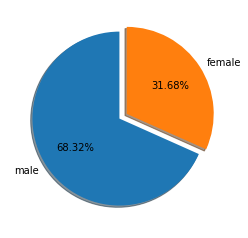

In [165]:
male = len(data[data.sex==1])
female = len(data[data.sex==0])
plt.pie(x=[male,female],explode=(0, 0.1),labels=('male','female'),shadow=True,autopct='%1.2f%%',startangle=90)
plt.show()

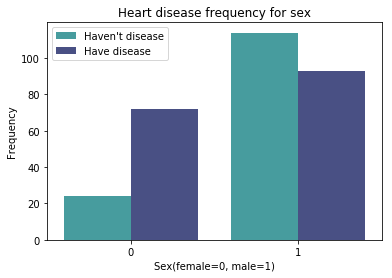

In [166]:
sns.countplot('sex',hue='target',data=data,palette='mako_r')
plt.title('Heart disease frequency for sex')
plt.xlabel('Sex(female=0, male=1)')
plt.xticks(rotation=0)
plt.legend(["Haven't disease","Have disease"])
plt.ylabel('Frequency')
plt.show()

**2. Chest Pain(CP)**

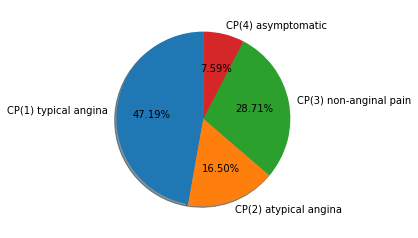

In [167]:
x = [len(data[data['cp']==0]), len(data[data['cp']==1]), len(data[data['cp']==2]), len(data[data['cp']==3])]
plt.pie(x, data=data, labels = ['CP(1) typical angina', 'CP(2) atypical angina', 'CP(3) non-anginal pain',
                                'CP(4) asymptomatic'], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()

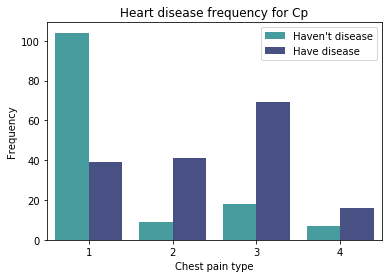

In [168]:
sns.countplot('cp',hue='target',data=data,palette='mako_r')
plt.title('Heart disease frequency for Cp')
plt.xlabel('Chest pain type')
plt.xticks(np.arange(4),[1,2,3,4],rotation=0)
plt.legend(["Haven't disease","Have disease"])
plt.ylabel('Frequency')
plt.show()

**3.restec(resting electro-cardiographic result)**

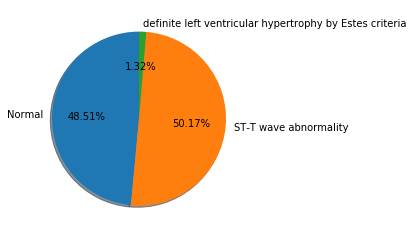

In [169]:
sizes = [len(data[data.restecg == 0]), len(data[data.restecg==1]), len(data[data.restecg==2])]
labels = ['Normal', 'ST-T wave abnormality', 'definite left ventricular hypertrophy by Estes criteria']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

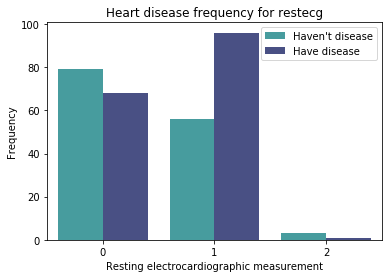

In [170]:
sns.countplot('restecg',hue='target',data=data,palette='mako_r')
plt.title('Heart disease frequency for restecg')
plt.xlabel('Resting electrocardiographic measurement')
plt.xticks(rotation=0)
plt.legend(["Haven't disease","Have disease"])
plt.ylabel('Frequency')
plt.show()

**4.exang**

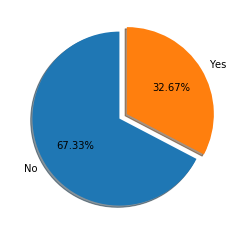

In [171]:
sizes = [len(data[data.exang==0]),len(data[data.exang==1])]
labels= ['No','Yes']
plt.pie(x=sizes, labels=labels, explode=(0,0.1),autopct='%1.2f%%',startangle=90,shadow=True)
plt.show()

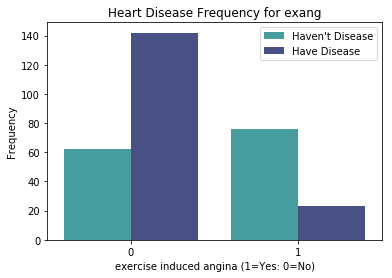

In [172]:
sns.countplot('exang', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for exang')
plt.xlabel('exercise induced angina (1=Yes: 0=No)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**5.thal:** blood disorder called thalessemia

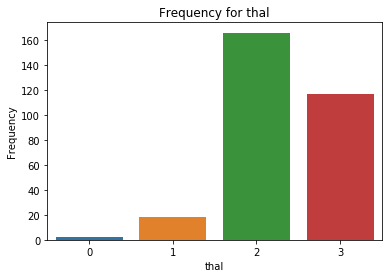

In [173]:
sns.countplot('thal', data=data)
plt.title('Frequency for thal')
plt.ylabel('Frequency')
plt.show()

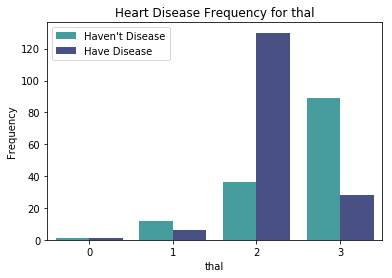

In [174]:
sns.countplot('thal', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for thal')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**6.Age**

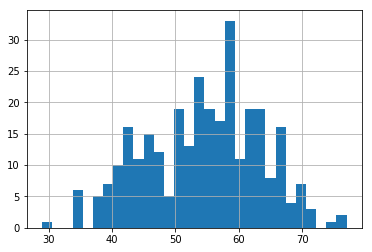

In [175]:
data.age.hist(bins=30)
plt.show()

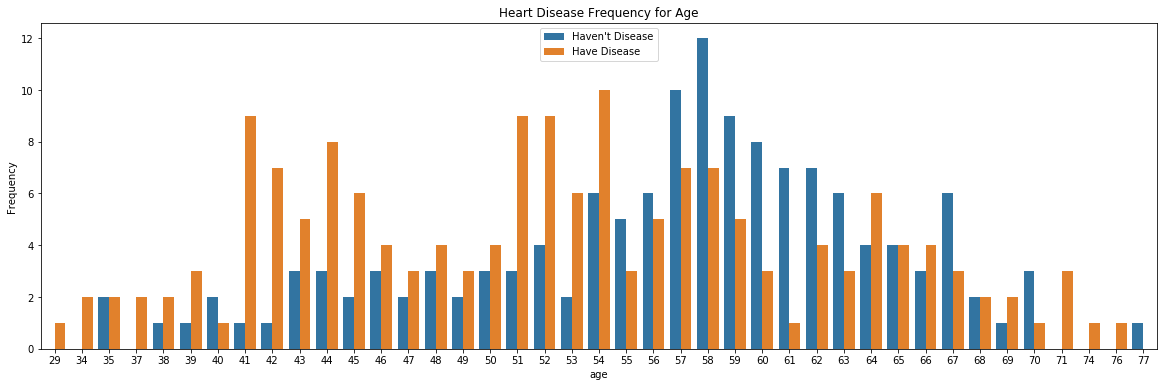

In [176]:
plt.figure(figsize=(20, 6))
sns.countplot('age', hue='target', data=data)
plt.title('Heart Disease Frequency for Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**7.chol**: serum cholestrol in mg

[]

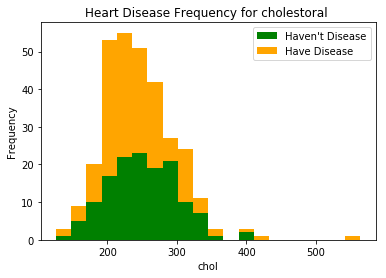

In [177]:

plt.hist([data.chol[data.target==0], data.chol[data.target==1]], bins=20,color=['green', 'orange'],
         stacked=True)
plt.xlabel('chol')
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for cholestoral ')
plt.ylabel('Frequency')
plt.plot()

**8.thalach**: max heart rate achieved

[]

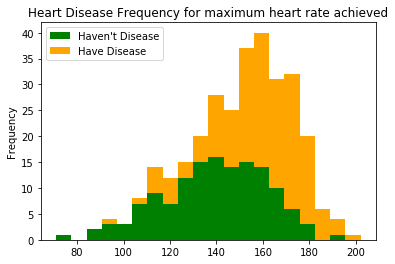

In [178]:
plt.hist([data.thalach[data.target==0], data.thalach[data.target==1]], bins=20,color=['green', 'orange'], stacked=True)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for maximum heart rate achieved')
plt.ylabel('Frequency')
plt.plot()

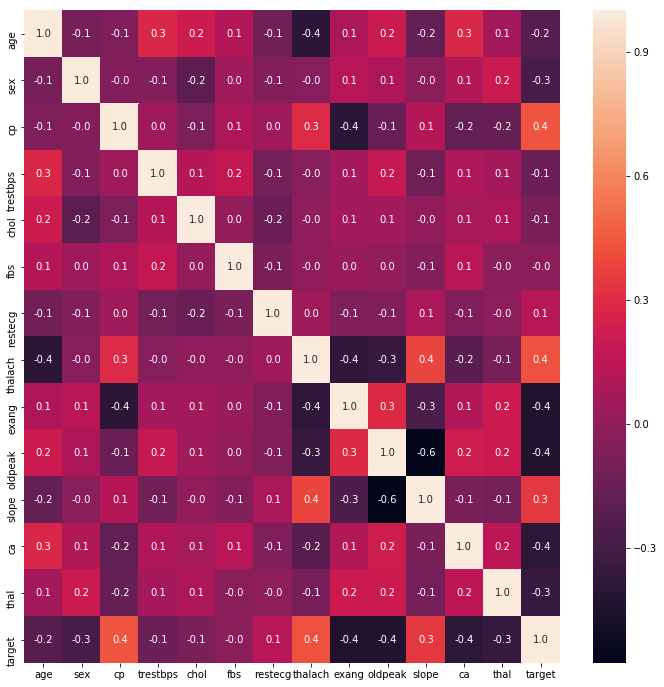

In [179]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

# Data preprocessing

Dataset contains categorical variable so we 
need to create dummy variables for
'cp,'thal'and 'slope'

In [180]:
cp = pd.get_dummies(data['cp'], prefix = "cp", drop_first=True)
thal = pd.get_dummies(data['thal'], prefix = "thal" , drop_first=True)
slope = pd.get_dummies(data['slope'], prefix = "slope", drop_first=True)

In [181]:
new_data = pd.concat([data,cp,thal,slope], axis=1)
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,1,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0,0,1,0,0,1


In [182]:
new_data.drop(['cp','thal','slope'],axis=1,inplace=True)
new_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


In [183]:
X = new_data.drop(['target'],axis=1)
y = new_data.target

**Normalize the data**

In [184]:
X = (X-X.min())/(X.max()-X.min())
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [185]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Train models
**Logistic Regression**

In [186]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9016393442622951

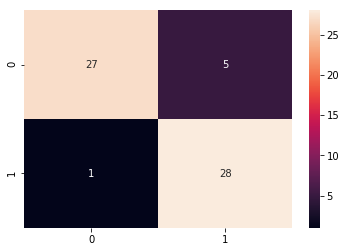

In [187]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, lr.predict(X_test))
sns.heatmap(cm,annot=True)
plt.show()

**Gaussian NB**

In [188]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.9344262295081968

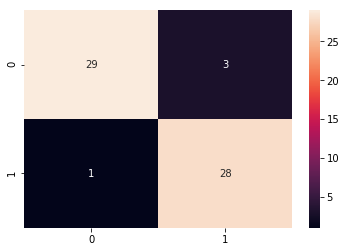

In [189]:
#Confusion matrix

cm = confusion_matrix(y_test,nb.predict(X_test))
sns.heatmap(cm,annot=True)
plt.show()

**Gradient Boosting Classifier**

In [190]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8852459016393442

[]

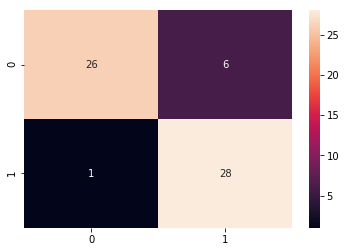

In [191]:
cm = confusion_matrix(y_test, gbc.predict(X_test))
sns.heatmap(cm, annot=True)
plt.plot()

In [192]:
algo = ['Logistic Regression','Gaussian NB','Gradient Boosting']
score = [al.score(X_test,y_test) for al in [lr,nb,gbc]]

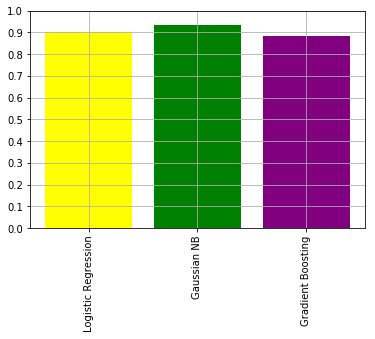

In [199]:

plt.grid()
plt.bar(x=algo, height=score, color=['yellow','green','purple'])
plt.xticks(rotation=90)
plt.ylim((0,1))
plt.yticks(np.arange(0,1.1,0.1))
plt.show()